In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = '^MSFT'
data = pd.DataFrame()
data[ticker] = wb.DataReader('MSFT', data_source='yahoo', start='2017-1-1')['Adj Close']

In [3]:
log_returns = np.log(1+data.pct_change())

In [4]:
log_returns.tail()

,^MSFT
Date,
2022-11-10,0.079059
2022-11-11,0.016854
2022-11-14,-0.022757
2022-11-15,0.001737
2022-11-16,-0.000992


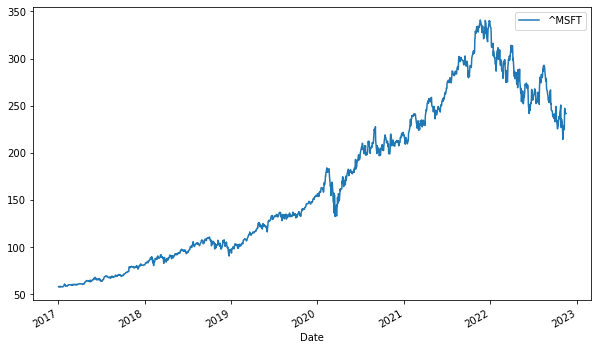

In [5]:
data.plot(figsize=(10,6));

<AxesSubplot:xlabel='Date'>

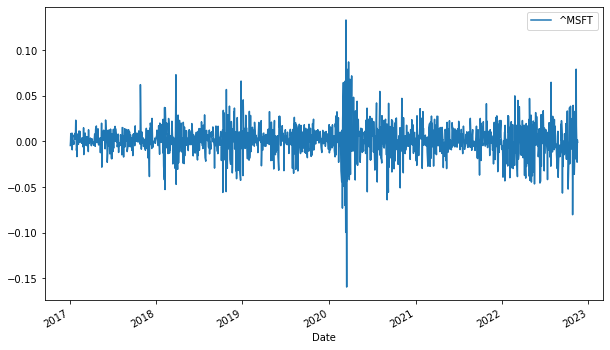

In [6]:
log_returns.plot(figsize = (10,6))

In [7]:
u = log_returns.mean()
u

^MSFT    0.000967
dtype: float64

In [8]:
var = log_returns.var()
var

^MSFT    0.000333
dtype: float64

Drift = u - 0.5*var

In [9]:
drift = u - (0.5*var)
drift

^MSFT    0.000801
dtype: float64

In [10]:
std = log_returns.std()
std

^MSFT    0.018258
dtype: float64

In [11]:
np.array(drift)

array([0.00080067])

In [12]:
drift.values

array([0.00080067])

In [13]:
std.values

array([0.01825788])

In [14]:
norm.ppf(0.95)

1.6448536269514722

In [15]:
x = np.random.rand(10,2)
x

array([[0.46990275, 0.81952162],
       [0.31169456, 0.27276331],
       [0.64022679, 0.14544136],
       [0.1486344 , 0.79897284],
       [0.43198646, 0.82326236],
       [0.95192559, 0.10155126],
       [0.32978045, 0.85597877],
       [0.74416118, 0.24937758],
       [0.89528489, 0.78041291],
       [0.45075632, 0.62120308]])

In [16]:
norm.ppf(x)

array([[-0.07551433,  0.9135435 ],
       [-0.49105277, -0.6044769 ],
       [ 0.35906506, -1.05618715],
       [-1.04230824,  0.83795793],
       [-0.17131902,  0.92786947],
       [ 1.66381795, -1.27276198],
       [-0.44051949,  1.06242572],
       [ 0.65622769, -0.67644972],
       [ 1.2551337 ,  0.77358849],
       [-0.12375074,  0.30864204]])

In [17]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-1.59584306e+00, -9.21454415e-01],
       [-2.09909642e+00,  5.57459640e-01],
       [ 1.01331480e+00,  4.00702615e-01],
       [ 5.65507231e-04,  8.48025563e-01],
       [ 2.19782682e-01, -7.50697710e-01],
       [-4.85998043e-01,  1.11504825e+00],
       [ 1.40836909e+00, -3.36976625e-01],
       [ 6.46432891e-01,  3.40275854e-01],
       [ 2.96473840e-01, -7.32501774e-01],
       [-1.55745863e+00, -6.82715570e-01]])

In [18]:
t_intervals = 365
iterations =10

In [19]:
daily_returns = np.exp(drift.values + std.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [20]:
daily_returns

array([[1.0128241 , 0.99643132, 0.98854252, ..., 1.00811564, 1.00687859,
        1.01037968],
       [0.99996216, 1.00361209, 0.99985095, ..., 0.99044493, 0.99158314,
        1.01156565],
       [0.97715693, 1.02032069, 1.01911859, ..., 0.98221209, 0.98791183,
        0.99347957],
       ...,
       [0.97002612, 1.01985464, 0.97866495, ..., 1.05510251, 0.99910473,
        1.01287099],
       [1.02889919, 1.01526115, 1.0318729 , ..., 1.00711004, 1.03191159,
        0.9967319 ],
       [0.95050896, 0.9924666 , 0.97794322, ..., 0.9995241 , 1.00687573,
        1.0173619 ]])

In [21]:
S0 = data.iloc[-1]
S0

^MSFT    241.729996
Name: 2022-11-16 00:00:00, dtype: float64

In [22]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
price_list[0] = S0
price_list

array([[241.72999573, 241.72999573, 241.72999573, ..., 241.72999573,
        241.72999573, 241.72999573],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [24]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [25]:
price_list

array([[241.72999573, 241.72999573, 241.72999573, ..., 241.72999573,
        241.72999573, 241.72999573],
       [241.72084922, 242.60314654, 241.69396597, ..., 239.42024834,
        239.69538814, 244.5257597 ],
       [236.19920407, 247.53300955, 246.31481365, ..., 235.16146233,
        236.79790849, 242.93134598],
       ...,
       [173.8218748 , 455.48317564, 561.35299935, ..., 586.14495795,
        302.53956718, 165.01714704],
       [178.84518603, 462.43437085, 579.24494863, ..., 590.31247474,
        312.19408616, 164.47785418],
       [169.99395092, 458.9506667 , 566.46866744, ..., 590.03154333,
        314.3406476 , 167.33350164]])

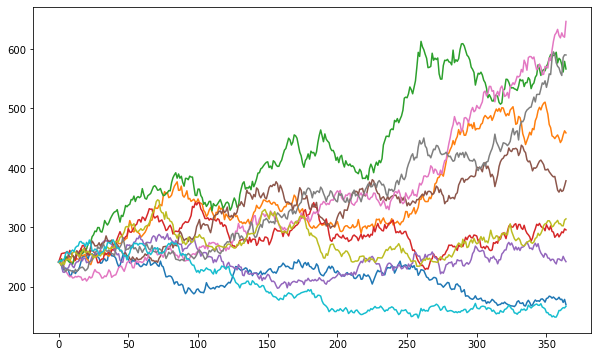

In [26]:
plt.figure(figsize = (10,6))
plt.plot(price_list)